In [7]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(point_1, point_2):
    """Return Euclidean distance between two points (x,y)."""
    return int(math.sqrt((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2) + 0.5)


def calculate_whole_cost_and_distance(points, route):
    """Compute total distance + node costs for a given route."""
    whole_cost = 0
    for i in range(len(route) - 1):
        p1 = points[route[i]]
        p2 = points[route[i + 1]]
        whole_cost += calculate_distance(p1[:2], p2[:2]) + p2[2]
    # Close the loop
    p_last = points[route[-1]]
    p_first = points[route[0]]
    whole_cost += calculate_distance(p_last[:2], p_first[:2]) + p_first[2]
    return whole_cost


def Draw_routes(points_file, route_file=None):
    # --- Load points (x;y;size) ---
    points = []
    with open(points_file, newline='') as f:
        reader = csv.reader(f, delimiter=';')
        for row in reader:
            if len(row) >= 3:
                x, y, s = map(float, row)
                points.append((x, y, s))

    points = np.array(points)
    positions = points[:, :2]
    sizes = points[:, 2]

    # --- Normalize sizes ---
    min_s, max_s = sizes.min(), sizes.max()
    sizes_norm = 10 * (sizes - min_s) / (max_s - min_s) + 1 if max_s > min_s else np.ones_like(sizes)

    # --- Case 1: No route file → only plot points ---
    if route_file is None:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_title('Raw nodes')
        ax.scatter(positions[:, 0], positions[:, 1], c='blue', s=sizes_norm * 4)
        ax.set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.show()
        return

    # --- Case 2: Route file provided ---
    routes = []
    with open(route_file, newline='') as f:
        reader = csv.reader(f, delimiter=';')
        for row in reader:
            route = [int(i) for i in row if i.strip() != '']
            if route:
                routes.append(route)

    nplots = len(routes)
    fig, ax = plt.subplots(nplots, sharex=True, sharey=True, figsize=(6, 6 * nplots))
    if nplots == 1:
        ax = [ax]
    else:
        ax = ax.ravel()

    for idx, route in enumerate(routes):
        route = np.array(route, dtype=int)
        in_route = np.zeros(len(positions), dtype=bool)
        in_route[route] = True
        colors = np.where(in_route, 'blue', 'red')

        ax[idx].scatter(positions[:, 0], positions[:, 1], c=colors, s=sizes_norm * 2)
        ax[idx].set_aspect('equal', adjustable='box')

        for i in range(len(route) - 1):
            start_node = route[i]
            end_node = route[i + 1]
            start_pos = positions[start_node]
            end_pos = positions[end_node]
            ax[idx].annotate("",
                             xy=end_pos, xycoords='data',
                             xytext=start_pos, textcoords='data',
                             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

        # Close the loop
        start_pos = positions[route[-1]]
        end_pos = positions[route[0]]
        ax[idx].annotate("",
                         xy=end_pos, xycoords='data',
                         xytext=start_pos, textcoords='data',
                         arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

        # --- Calculate and display total cost ---
        total_cost = calculate_whole_cost_and_distance(points, route)
        ax[idx].text(
            0.98, 0.98, f"Total cost: {total_cost:.0f}",
            transform=ax[idx].transAxes,
            fontsize=10, fontweight='bold',
            color='darkgreen',
            ha='right', va='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7)
        )

    plt.tight_layout()
    plt.show()



Drawing raw points for TSPA


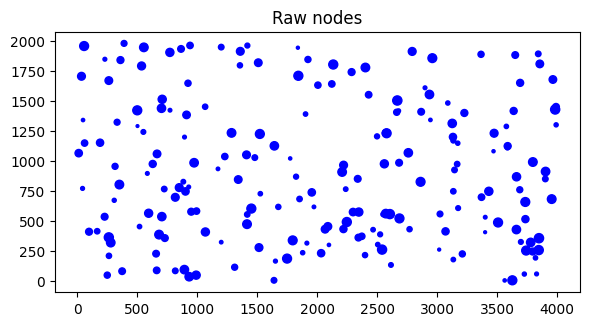

Drawing best Hamiltonian cycle found with Random for TSPA


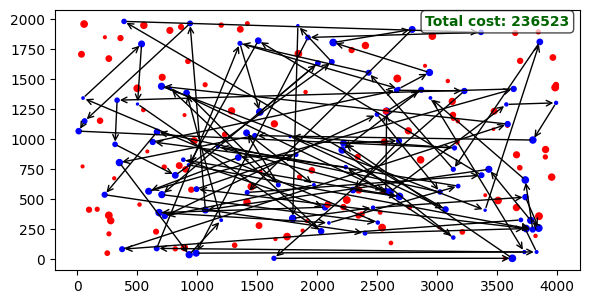

Drawing best Hamiltonian cycle found with NNE for TSPA


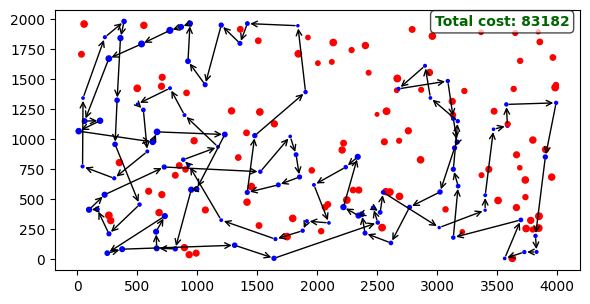

Drawing best Hamiltonian cycle found with NN for TSPA


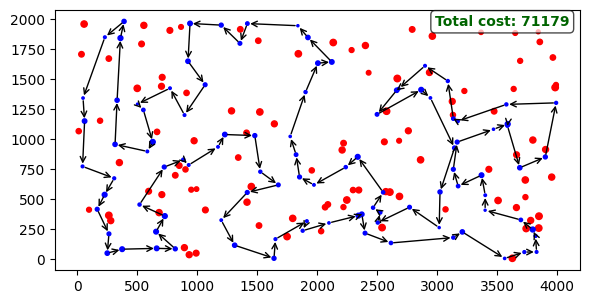

Drawing best Hamiltonian cycle found with GC for TSPA


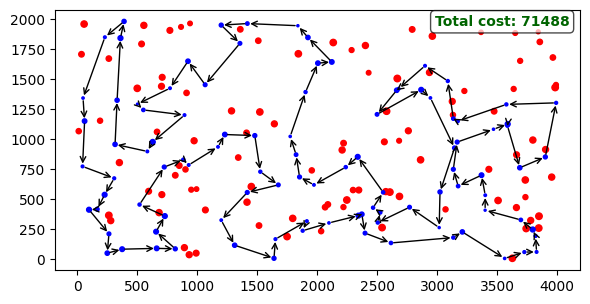

Drawing raw points for TSPB


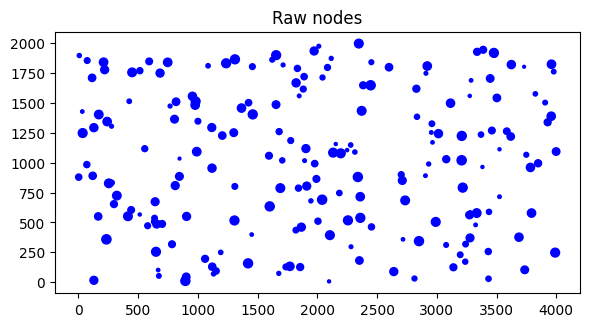

Drawing best Hamiltonian cycle found with Random for TSPB


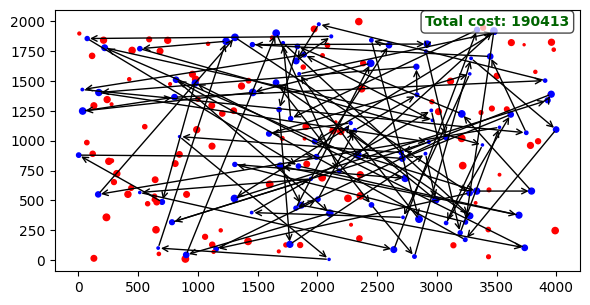

Drawing best Hamiltonian cycle found with NNE for TSPB


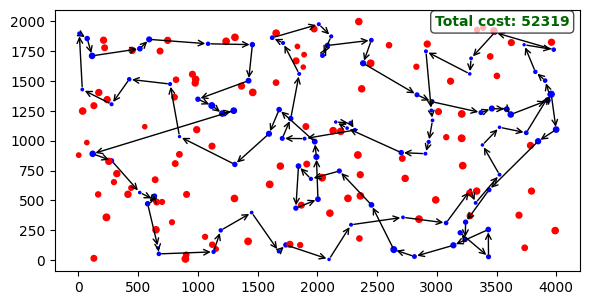

Drawing best Hamiltonian cycle found with NN for TSPB


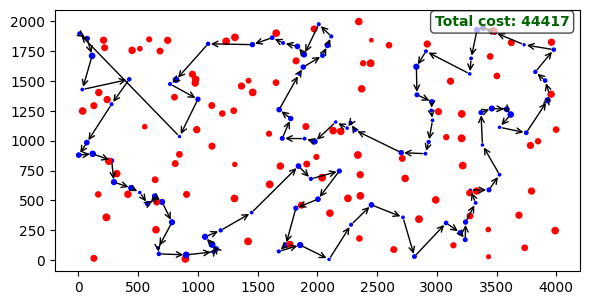

Drawing best Hamiltonian cycle found with GC for TSPB


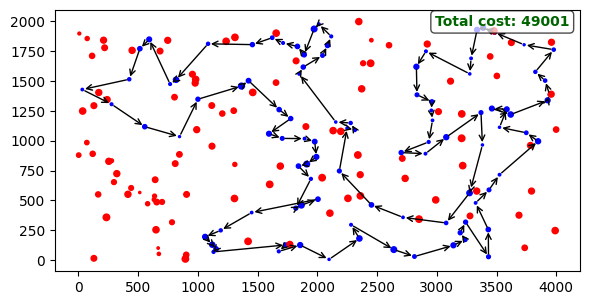

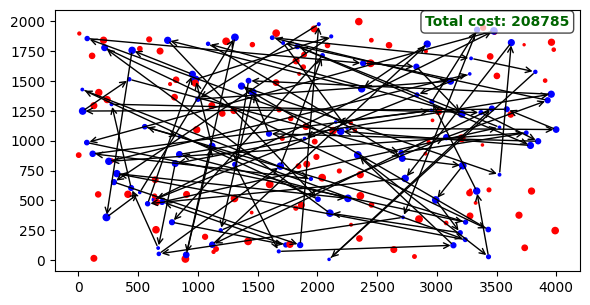

In [ ]:
for i in  ['A', 'B']:
    print(f'Drawing raw points for TSP{i}')
    Draw_routes(f'TSP{i}.csv')
    for j in ['Random', 'NNE', 'NN', 'GC']:
        print(f'Drawing best Hamiltonian cycle found with {j} for TSP{i}')
        Draw_routes(f'TSP{i}.csv', f'{j}_best_{i}.csv')